Data Analysis and Model Building

In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Reading in the csv file into a dataframe

In [428]:
dataset = pd.read_csv('Dataset for Assignment v2.csv')

Getting a row and column count

In [429]:
dataset.shape

(1051, 17)

Checking for missing values

In [430]:
dataset.isnull().values.any()

True

In [431]:
dataset.isnull().sum()

Bedrooms            0
Bathrooms           2
Address             0
Land area           0
CV                  0
Latitude            0
Longitude           0
SA1                 0
0-19 years          0
20-29 years         0
30-39 years         0
40-49 years         0
50-59 years         0
60+ years           0
Suburbs             1
Population count    0
NZDep2018           0
dtype: int64

In [432]:
dataset[dataset.isnull().values.any(axis=1)].head()

Bedrooms  Bathrooms                                            Address  \
309         4        NaN                  14 Hea Road Hobsonville, Auckland   
311         4        NaN                  16 Hea Road Hobsonville, Auckland   
568         1        1.0  14 Te Rangitawhiri Road Great Barrier Island, ...   

    Land area       CV   Latitude   Longitude      SA1  0-19 years  \
309       214  1250000 -36.798371  174.647430  7002267          60   
311       245  1100000 -36.798371  174.647430  7002267          60   
568      2141   740000 -36.197282  175.416921  7001131          27   

     20-29 years  30-39 years  40-49 years  50-59 years  60+ years  \
309           66           60           24           24         18   
311           66           60           24           24         18   
568            6            6           18           39         60   

         Suburbs  Population count  NZDep2018  
309  Hobsonville               252        2.0  
311  Hobsonville               252        2.0  
568          NaN               156        9.0

Dropping rows with missing values

In [433]:
dataset = dataset.dropna(axis=0, how='any')

Checking data type of each column

In [434]:
dataset.dtypes

Bedrooms              int64
Bathrooms           float64
Address              object
Land area            object
CV                    int64
Latitude            float64
Longitude           float64
SA1                   int64
0-19 years            int64
20-29 years           int64
30-39 years           int64
40-49 years           int64
50-59 years           int64
60+ years             int64
Suburbs              object
Population count      int64
NZDep2018           float64
dtype: object

Investigating values under the 'Land area' column as land area is supposed to be numerical (int or float)

In [435]:
dataset['Land area'].unique()

array(['714', '564', '626', '65', '601', '100', '531', '1024', '80',
       '204', '170', '637', '640', '650', '138', '75', '724', '429',
       '520', '1381', '732', '799', '1105', '463', '681', '4068', '106',
       '713', '211', '402', '883', '883 m²', '675', '388', '1034', '1295',
       '1102', '551', '809', '1108', '745', '613', '758', '727', '59',
       '260 m²', '126', '615', '756', '3609', '431', '3648', '3177',
       '545', '420 m²', '481', '279', '120', '1037', '202', '1031', '602',
       '810', '475', '736', '110', '99', '153', '245', '2567 m²', '1500',
       '885', '480', '377', '688', '10557', '405', '561', '255', '519',
       '522', '651', '559', '420', '472', '1067', '726', '251', '220',
       '1467', '701', '826', '743', '272', '672', '772', '318', '895',
       '2028', '371', '93', '286', '623', '479', '113', '469', '898',
       '370', '422', '868', '880', '690', '238', '569', '8000', '8129',
       '447', '744', '630', '415', '804', '323', '728', '580', '140',

Changing the data type of values under the 'Land area' column from object to int by extracting only digits from the object (no m²) as strs then casting them as int afterwards

In [436]:
dataset['Land area'] = dataset['Land area'].str.extract('(\d+)', expand=False)

In [437]:
dataset['Land area'] = dataset['Land area'].astype(int)

Replacing the suburb column with the suburb's mean CV

Because the model score was too low the first time I tried building the model, the categorical variable ‘Suburbs’ was replaced with the numerical variable ‘mean suburb CV’ to improve the score of the linear regression model

In [438]:
def get_mean_suburb_cv(suburb):
    """
    Takes the suburb name as an input and returns the mean suburb CV as the output.
    """
    
    suburb_dataset = dataset[dataset['Suburbs']==suburb]
    mean_suburb_cv = suburb_dataset['CV'].mean(axis=0)
    return mean_suburb_cv

In [439]:
dataset['Suburbs'] = dataset.Suburbs.apply(get_mean_suburb_cv)

Renaming the 'Suburbs' column to 'Mean suburb CV'

In [440]:
dataset = dataset.rename(columns={'Suburbs': 'Mean suburb CV'})

Checking basic statistics for each numerical column

In [441]:
dataset.describe()

Bedrooms    Bathrooms     Land area            CV     Latitude  \
count  1048.000000  1048.000000   1048.000000  1.048000e+03  1048.000000   
mean      3.779580     2.074427    856.961832  1.388544e+06   -36.894561   
std       1.167894     0.992904   1589.698071  1.184422e+06     0.128426   
min       1.000000     1.000000     40.000000  2.700000e+05   -37.265021   
25%       3.000000     1.000000    323.000000  7.800000e+05   -36.950873   
50%       4.000000     2.000000    571.500000  1.080000e+06   -36.893409   
75%       4.000000     3.000000    825.000000  1.600000e+06   -36.856280   
max      17.000000     8.000000  22240.000000  1.800000e+07   -36.177655   

         Longitude           SA1   0-19 years  20-29 years  30-39 years  \
count  1048.000000  1.048000e+03  1048.000000  1048.000000   1048.00000   
mean    174.799026  7.006332e+06    47.544847    28.915076     27.00000   
std       0.117991  2.583920e+03    24.713408    20.993232     17.93158   
min     174.317078  7.001130e+06     0.000000     0.000000      0.00000   
25%     174.722226  7.004426e+06    33.000000    15.000000     15.00000   
50%     174.798612  7.006334e+06    45.000000    24.000000     24.00000   
75%     174.880943  7.008390e+06    57.000000    36.000000     33.00000   
max     175.492424  7.011028e+06   201.000000   270.000000    177.00000   

       40-49 years  50-59 years    60+ years  Mean suburb CV  \
count  1048.000000  1048.000000  1048.000000    1.048000e+03   
mean     24.131679    22.597328    29.353053    1.388544e+06   
std      10.956798    10.212455    21.810055    7.416379e+05   
min       0.000000     0.000000     0.000000    3.250000e+05   
25%      18.000000    15.000000    18.000000    8.550000e+05   
50%      24.000000    21.000000    27.000000    1.157895e+06   
75%      30.000000    27.000000    36.000000    1.618333e+06   
max     114.000000    90.000000   483.000000    6.200000e+06   

       Population count    NZDep2018  
count       1048.000000  1048.000000  
mean         179.799618     5.065840  
std           71.087298     2.912027  
min            3.000000     1.000000  
25%          138.000000     2.000000  
50%          174.000000     5.000000  
75%          207.750000     8.000000  
max          789.000000    10.000000

Checking histograms for each numerical column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda56b1e0f0>,
      dtype=object)

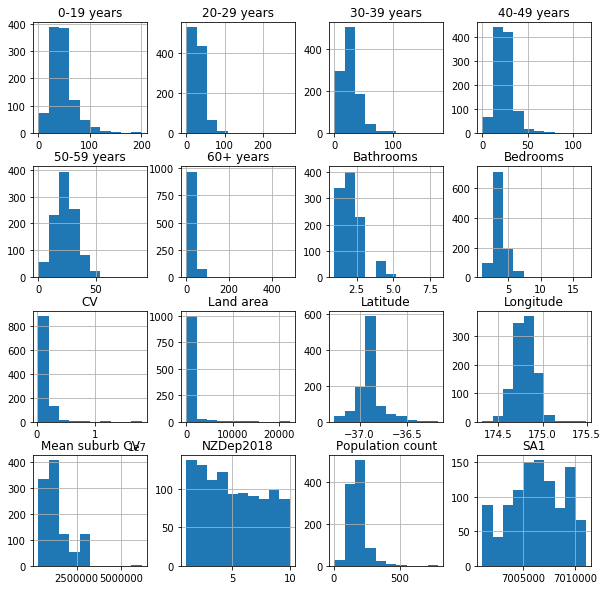

In [442]:
dataset.hist(figsize=(10,10))

Checking the pairs plot of the explanatory variables

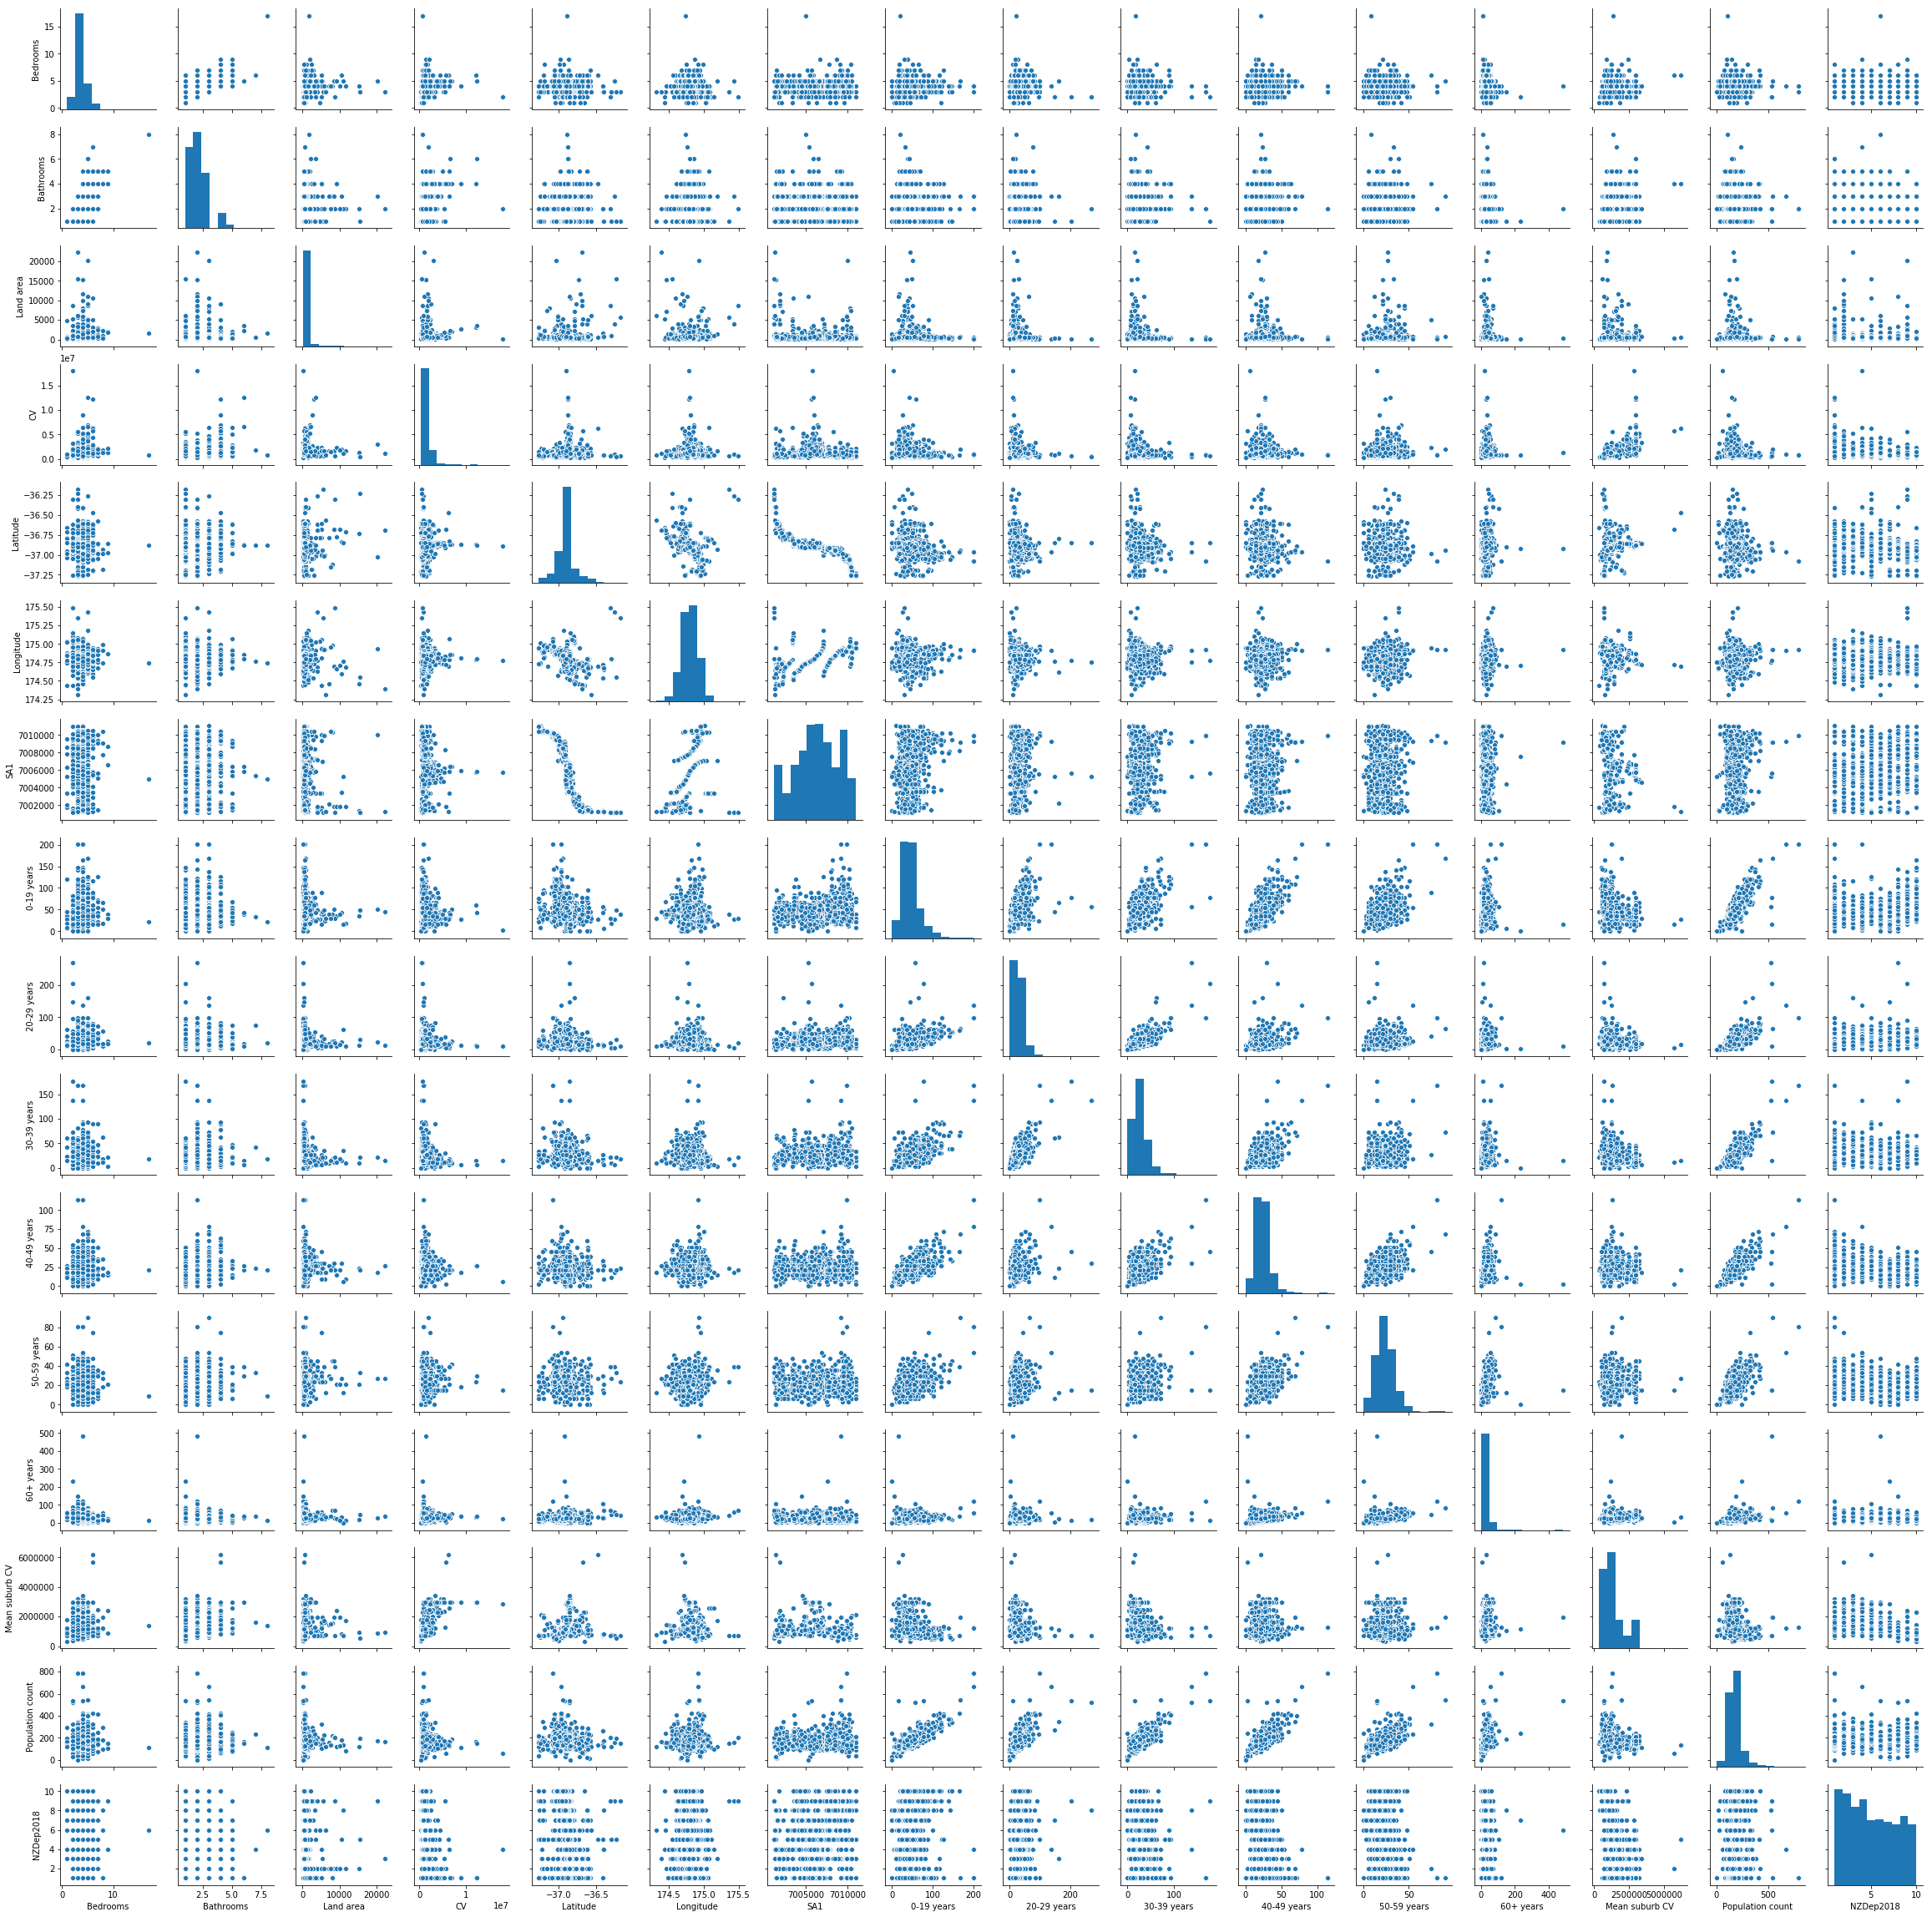

In [443]:
sns.pairplot(dataset, height=2.0)

Checking the correlation for the explanatory variables

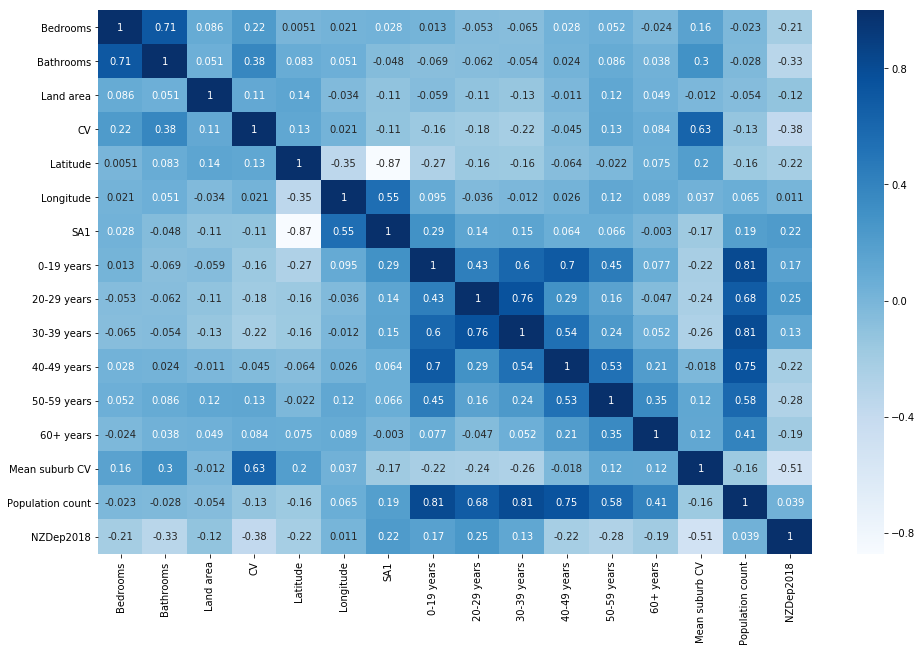

In [444]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

Building the linear regression model

In [445]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(dataset.drop(['CV', 'Address', 'SA1', '0-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60+ years', 'Population count', 'NZDep2018'], axis=1), dataset['CV'], test_size=0.3, random_state=42)

In [446]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Calculating the model score

In [447]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.3402701355419463

Drawing the scatter and linear regression plots

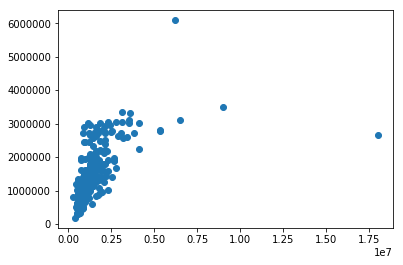

In [448]:
plt.scatter(test_y, predicted)

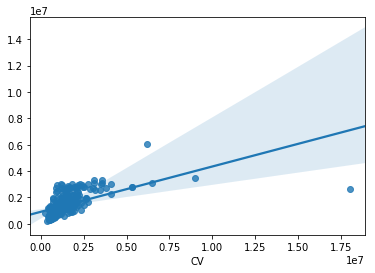

In [451]:
sns.regplot(test_y, predicted)
plt.show()

Writing out to csv file

In [450]:
dataset.to_csv('Dataset for Assignment v3.csv', index=False)

For a more detailed explanation, check out my pdf report